In [1]:
import parseTraces as pt
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch
import skimage
from sklearn.metrics import confusion_matrix
from scipy import signal
from IPython.display import clear_output
import pandas as pd

#### Brajdic and Harle 2013 subject list

In [2]:
subj_dict = {'p1.1_Female_20-29_170-179cm_Hand_held.out':[1607,5393],
              'p2.2_Male_20-29_180-189cm_Hand_held.out':[1999,5930],
              'p3.1_Male_20-29_170-179cm_Hand_held.out':[3057,8623],
              'p4.1_Male_20-29_170-179cm_Hand_held.out':[891,5425],
              'p5.1_Female_20-29_160-169cm_Hand_held.out':[1087,4956],
              'p6.1_Male_15-19_180-189cm_Hand_held.out':[2410,7400],
              'p7.1_Male_20-29_180-189cm_Hand_held.out':[1573,5249],
              'p8.1_Male_20-29_170-179cm_Hand_held.out':[1557,7596],
              'p9.1_Female_15-19_160-169cm_Hand_held.out':[1562,5614],
              #'p10.1_Male_20-29_170-179cm_Hand_held.dat':[6123,11092],
              'p11.1_Male_20-29_170-179cm_Hand_held.out':[1513,6361],
              #'p12.2_Male_15-19_180-189cm_Hand_held.dat':[3061,6744],
              'p13.1_Female_20-29_160-169cm_Hand_held.out':[2214,6828],
              'p14.1_Male_20-29_160-169cm_Hand_held.out':[1878,6203],
              'p15.1_Male_20-29_180-189cm_Hand_held.out':[1241,5295],
              'p16.1_Male_15-19_180-189cm_Hand_held.out':[3006,7487],
              'p17.1_Female_20-29_150-159cm_Hand_held.out':[2311,7629],
              'p18.1_Male_20-29_180-189cm_Hand_held.out':[971,5275],
              'p19.1_Female_20-29_150-159cm_Hand_held.out':[1869,6563],
              'p20.1_Male_20-29_170-179cm_Hand_held.out':[1573,5717],
              'p21.1_Male_20-29_180-189cm_Hand_held.out':[1346,4763],
              'p22.1_Male_20-29_170-179cm_Hand_held.out':[963,6582],
              #'p23.1_Female_20-29_160-169cm_Hand_held.out':[1363,6353],
              'p24.1_Male_20-29_170-179cm_Hand_held.out':[2182,5767],
              'p25.1_Female_20-29_170-179cm_Hand_held.out':[1359,5910],
              'p26.2_Female_20-29_150-159cm_Hand_held.out':[1166,5829]}
              #'p27.1_Male_15-19_170-179cm_Hand_held.dat':[7325,11053]}


In [3]:
def plot_gyro(dict_element):

    accTs, accData, gyroTs, gyroData, magnTs, magnData = pt.parseTrace(f'./walking_data/{dict_element[0]}')

    gyro_x = [item[0] for item in gyroData][dict_element[1][0]:dict_element[1][1]]
    gyro_y = [item[1] for item in gyroData][dict_element[1][0]:dict_element[1][1]]
    gyro_z = [item[2] for item in gyroData][dict_element[1][0]:dict_element[1][1]]

    if np.std(gyro_x) > np.std(gyro_y) and np.std(gyro_x) > np.std(gyro_z):
        print('gyro x')
    elif np.std(gyro_y) > np.std(gyro_x) and np.std(gyro_y) > np.std(gyro_z):
        print('gyro y')
    else:
        print('gyro z')
    plt.figure()
    plt.plot(gyro_x)
    plt.xlim([1000, 1500])
    plt.show;

#### most sensitve gyro axis

gyro y
gyro x
gyro z
gyro z
gyro x
gyro z
gyro x
gyro z
gyro y
gyro x
gyro x
gyro x
gyro z
gyro x
gyro z
gyro x
gyro x
gyro x
gyro x
gyro x
gyro x


/Users/henryvalk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/henryvalk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/henryvalk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To cont

gyro x
gyro x


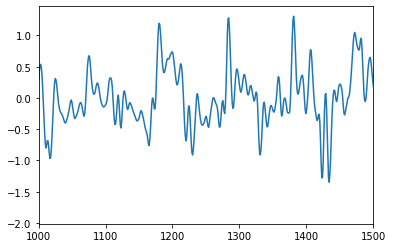

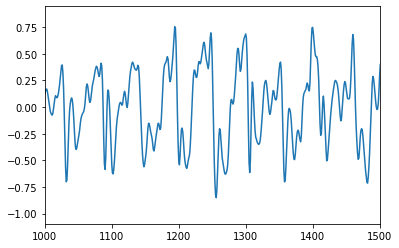

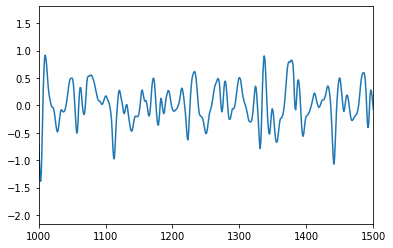

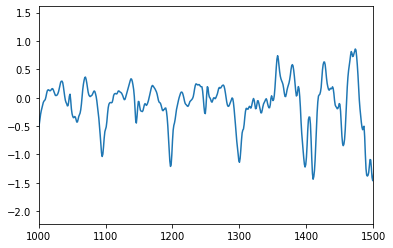

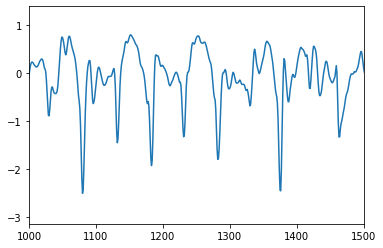

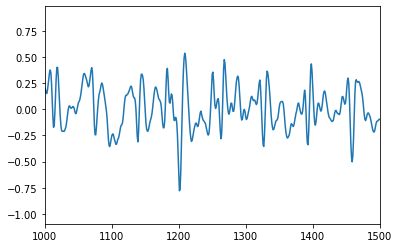

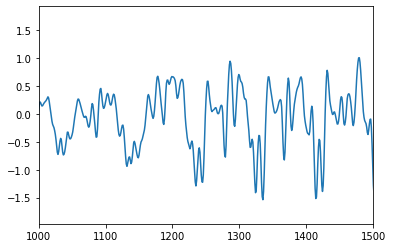

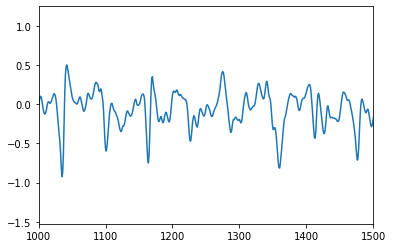

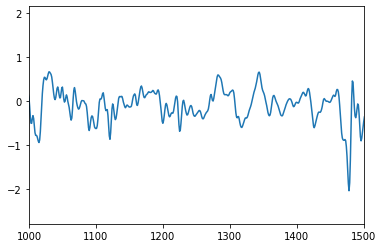

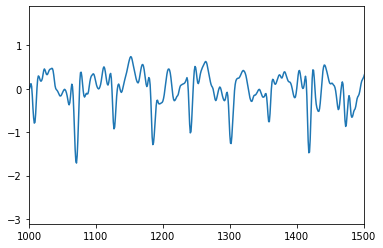

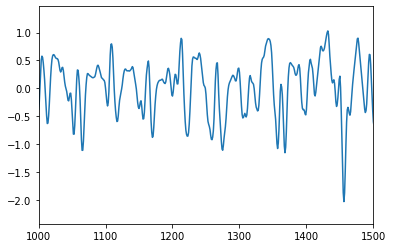

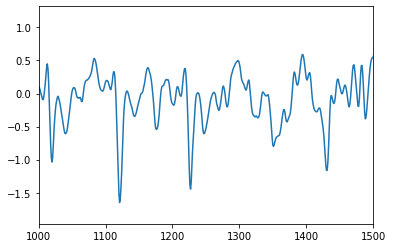

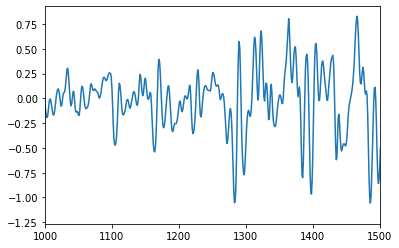

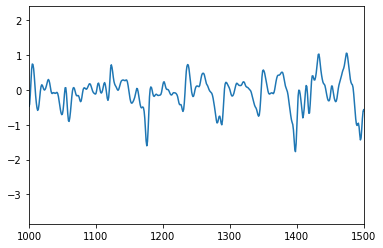

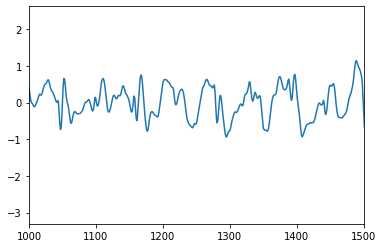

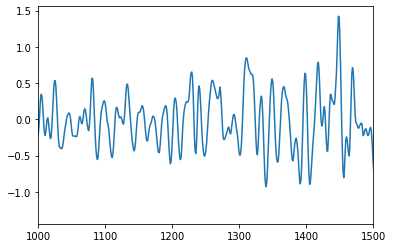

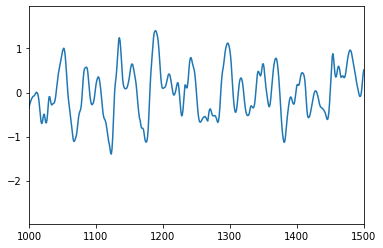

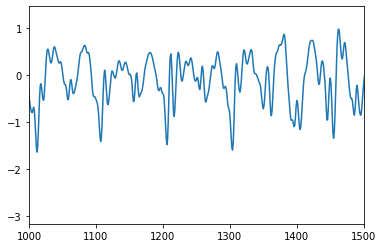

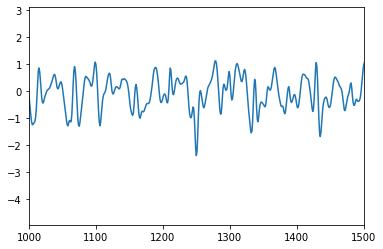

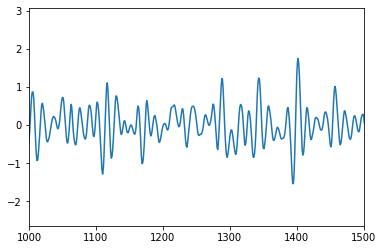

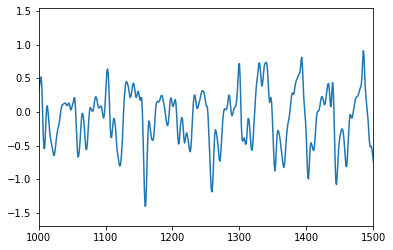

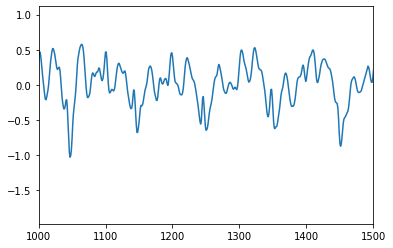

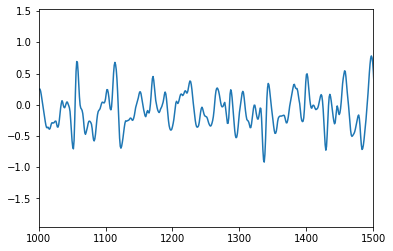

In [4]:
for subj in subj_dict.items():
    plot_gyro(subj)

#### Plot power spectrum density

In [5]:
def plot_psd(dict_element):
    
    acc_z = pull_acc_z_no_walk(dict_element)
    
    f, psd = welch(acc_z[:250], fs=100, window='hanning', nperseg=256, detrend='constant')
    
    plt.figure()
    plt.plot(f, psd)
    plt.plot(f[np.argmax(psd)], max(psd), 'r*', MarkerSize=10)
    plt.xlim([0, 10]);

In [6]:
all_steps = []

#### Run PeakDetect to approximate step boundaries. Functions from imported module don't work? So running code directly

In [7]:
# http://admit.astro.umd.edu/admit/module/admit.util.peakfinder/PeakDetect.html

import copy

__version__ = "1.0.4"


class PeakDetect(object):
    """ Detect peaks in data based on their amplitude and other features.

        Parameters
        ----------
        spec : 1D array_like
            The input spectra to search for peaks.

        x : 1D array_like
            The x co-ordinates for the spectrum (optional).
            Default: None.

        kwarg : Dict
            Any additional arguments, see the Attributes list for a complete
            listing.

        Attributes
        ----------
        spec : 1D array_like
            The input spectra to search for peaks.

        x : 1D array_like
            The x co-ordinates for the spectrum (optional)
            Default: None.

        thresh : float
            Detect peaks that are greater than minimum peak height.
            Default: 0.0.

        min_sep : int
            Detect peaks that are at least separated by minimum peak distance, in
            number of channels.
            Default : 5.

        edge : str
            One of 'rising', 'falling', or 'both', optional.
            For a flat peak, keep only the rising edge ('rising'), only the
            falling edge ('falling'), both edges ('both').
            Default : 'rising'.

        kpsh : bool
            Keep peaks with same height even if they are closer than `min_sep`,
            optional.
            Default: False.

        Examples
        --------
        .. code-block:: python

           from admit.util.peakfinder.PeakDetect import PeakDetect
           import numpy as np
           x = np.random.randn(100)
           x[60:81] = np.nan
           # detect all peaks
           pd = PeakDetect(x)
           ind = pd.find()
           print(ind)

           x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
           # set minimum peak height = 0 and minimum peak distance = 20
           pd = PeakDetect(x, min_sep=20, thresh=0)
           ind = pd.find()

           x = [0, 1, 0, 2, 0, 3, 0, 2, 0, 1, 0]
           # set minimum peak distance = 2
           pd = PeakDetect(x, min_sep=2)
           ind = pd.find()

           x = [0, 1, 1, 0, 1, 1, 0]
           # detect both edges
           pd = PeakDetect(x, edge='both')
           ind = pd.find()

    """
    # set default values
    min_sep = 5
    thresh = 0.0
    edge = 'rising'
    kpsh = False

    def __init__(self, spec, x=None, **kwarg):
        # set the x axis if it is not given
        if x is None:
            self.x = np.arange(float(spec.shape[0]))
        else:
            if isinstance(x, list):
                self.x = np.array(x, dtype=float)
            else:
                self.x = x.astype(float)
        self.spec = np.atleast_1d(spec).astype('float64')
        # set any other arguments that were given
        for k, v, in kwarg.items():
            # ingore any attributes we don't have
            if hasattr(self, k):
                if type(getattr(self, k)) != type(v):
                    raise Exception("Cannot change the type of a variable in PeakDetect. %s is of type %s, not %s." % (k, type(getattr(self, k)), type(v)))
                setattr(self, k, v)

    def find(self):
        """ Method to locate peaks in an input spectrum

            Parameters
            ----------
            None

            Returns
            -------
            Numpy array containing the located peaks

        """
        # get the positive peaks
        pks = self.detect_peaks(copy.deepcopy(self.spec))
        # get the negative valleys
        pks2 = self.detect_peaks(copy.deepcopy(self.spec), True)

        peaks = []
        # get the x values of the points
        for i in np.concatenate((pks, pks2)):
            peaks.append(self.x[i])

        return np.array(peaks).astype(float)


    def detect_peaks(self, spec, valley=False):
        """ Detects peaks.

            Parameters
            ----------
            spec : 1D array
                The specrum to analyze.

            valley : bool
                Whether to search for peaks (positive) or valleys (negative).
                Default: False

            Returns
            -------
            1D array_like
                indeces of the peaks in `spec`.

            Notes
            -----
            The detection of valleys instead of peaks is performed internally by simply
            negating the data: `ind_valleys = detect_peaks(-x)`
    
            The function can handle NaN's 

            See this IPython Notebook [1]_.

            References
            ----------
            .. [1] http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/DetectPeaks.ipynb

        """
        # can't do any work if there are less than 3 points to work with
        if spec.size < 3:
            return np.array([], dtype=int)
        # if we are looking for valleys, then invert the spectra
        if valley:
            spec = -spec
        # find indexes of all peaks
        dx = spec[1:] - spec[:-1]
        # handle NaN's
        indnan = np.where(np.isnan(spec))[0]
        if indnan.size:
            spec[indnan] = np.inf
            dx[np.where(np.isnan(dx))[0]] = np.inf
        ine, ire, ife = np.array([[], [], []], dtype=int)
        if not self.edge:
            ine = np.where((np.hstack((dx, 0)) < 0) & (np.hstack((0, dx)) > 0))[0]
        else:
            if self.edge.lower() in ['rising', 'both']:
                ire = np.where((np.hstack((dx, 0)) <= 0) & (np.hstack((0, dx)) > 0))[0]
            if self.edge.lower() in ['falling', 'both']:
                ife = np.where((np.hstack((dx, 0)) < 0) & (np.hstack((0, dx)) >= 0))[0]
        ind = np.unique(np.hstack((ine, ire, ife)))
        # handle NaN's
        if ind.size and indnan.size:
            # NaN's and values close to NaN's cannot be peaks
            ind = ind[np.invert(np.in1d(ind, np.unique(np.hstack((indnan, indnan-1, indnan+1)))))]
        # first and last values of x cannot be peaks
        if ind.size and ind[0] == 0:
            ind = ind[1:]
        if ind.size and ind[-1] == spec.size-1:
            ind = ind[:-1]
        # remove peaks < minimum peak height
        if ind.size and self.thresh is not None:
            ind = ind[spec[ind] >= self.thresh]
        # detect small peaks closer than minimum peak distance
        if ind.size and self.min_sep > 1:
            ind = ind[np.argsort(spec[ind])][::-1]  # sort ind by peak height
            idel = np.zeros(ind.size, dtype=bool)
            for i in range(ind.size):
                if not idel[i]:
                    # keep peaks with the same height if kpsh is True
                    idel = idel | (ind >= ind[i] - self.min_sep) & (ind <= ind[i] + self.min_sep) \
                        & (spec[ind[i]] > spec[ind] if self.kpsh else True)
                    idel[i] = 0  # Keep current peak
            # remove the small peaks and sort back the indexes by their occurrence
            ind = np.sort(ind[~idel])

        return ind

#### Calculate average step for each participant

In [1]:
for subj in subj_dict.items():   
    
    from scipy.signal import savgol_filter

    accTs, accData, gyroTs, gyroData, magnTs, magnData = pt.parseTrace(f'./walking_data/{subj[0]}')

    acc_z = [item[2] for item in accData][subj[1][0]:subj[1][1]]
    gyro_x = [item[0] for item in gyroData][subj[1][0]:subj[1][1]]

    yhat = savgol_filter(acc_z, 51, 3) # window size 51, polynomial order 3
    
    #print(argrelextrema(yhat, np.less)[0].shape)
    #minima = argrelextrema(yhat, np.less)[0]
    
    # flip timeseries to find troughs not peaks
    pkd = PeakDetect(yhat, x=[], min_sep=30, thresh=float(np.mean([-x for x in yhat])))
    #minima = pd.detect_peaks(np.array([-x+20 for x in yhat]))
    minima = pkd.detect_peaks(np.array(yhat,), valley=True)
    
    # create segements based on trough points
    segments = []
    for min_x in range(minima.shape[0]-1):
        temp = slice(minima[min_x], minima[min_x+1])
        segments.append(temp)

    import math

    acc_segments = []
    gyro_segments = []

    for seg in segments:
        acc_segments.append(acc_z[seg])
        gyro_segments.append(gyro_x[seg])

    max_step = max([len(step) for step in acc_segments])

    acc_segments2 = []
    step_mean_acc = int(np.mean([len(x) for x in acc_segments]))
    for step in acc_segments:
        f_acc = signal.resample(step, step_mean_acc)
        f_acc = (f_acc - np.mean(f_acc))/np.std(f_acc)
        #step = np.pad(step, pad_width=(math.floor((max_step - len(step))/2),math.ceil((max_step - len(step))/2)), mode='constant',constant_values=0)
        acc_segments2.append(f_acc)

    gyro_segments2 = []
    step_mean_gyro = int(np.mean([len(x) for x in gyro_segments]))
    for step in gyro_segments:
        f_gyro = signal.resample(step, step_mean_gyro)
        f_gyro = (f_gyro - np.mean(f_gyro))/np.std(f_gyro)
        #step = np.pad(step, pad_width=(math.floor((max_step - len(step))/2),math.ceil((max_step - len(step))/2)), mode='constant',constant_values=0)
        gyro_segments2.append(f_gyro)

    mean_acc = np.mean(acc_segments2, axis=0)
    mean_gyro = np.mean(gyro_segments2, axis=0)
    
    # plot mean step for most senstive axis from acc (blue) and gyro (orange)
    plt.figure();
    plt.plot(mean_acc)
    plt.plot(mean_gyro)
    
    all_steps.append([mean_acc, mean_gyro])
    

NameError: name 'subj_dict' is not defined

#### Create grand average mean from all participants

In [10]:
ga_step_mean = int(np.mean([len(x[0]) for x in all_steps]))

In [11]:
ga_acc = []
ga_gyro = []
for step in all_steps:
        ga_acc = signal.resample(step[0], ga_step_mean)
        ga_gyro = signal.resample(step[1], ga_step_mean)

Text(0.5, 1.0, 'Step Template')

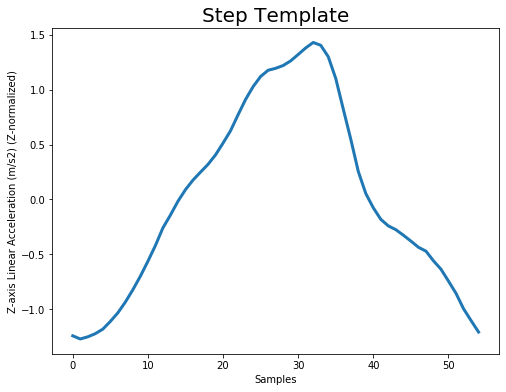

In [18]:
plt.figure(figsize=(8,6))
plt.plot(ga_acc, LineWidth = 3)
plt.xlabel('Samples')
plt.ylabel('Z-axis Linear Acceleration (m/s2) (Z-normalized)')
plt.title('Step Template', fontsize=20)
#plt.plot(ga_gyro);

In [14]:
step_template_df = pd.DataFrame({'acc': ga_acc, 'gyro': ga_gyro})
step_template_df

,acc,gyro
0,-1.242370,0.035163
1,-1.271202,-0.015238
2,-1.251582,-0.044221
3,-1.222887,-0.088736
4,-1.181840,-0.118862
5,-1.111560,-0.159075
6,-1.033583,-0.205018
7,-0.935041,-0.258268
8,-0.822643,-0.319465
9,-0.699254,-0.350770


#### Create animated visualization of single step in 3 dimensions (time x acc x gyro)

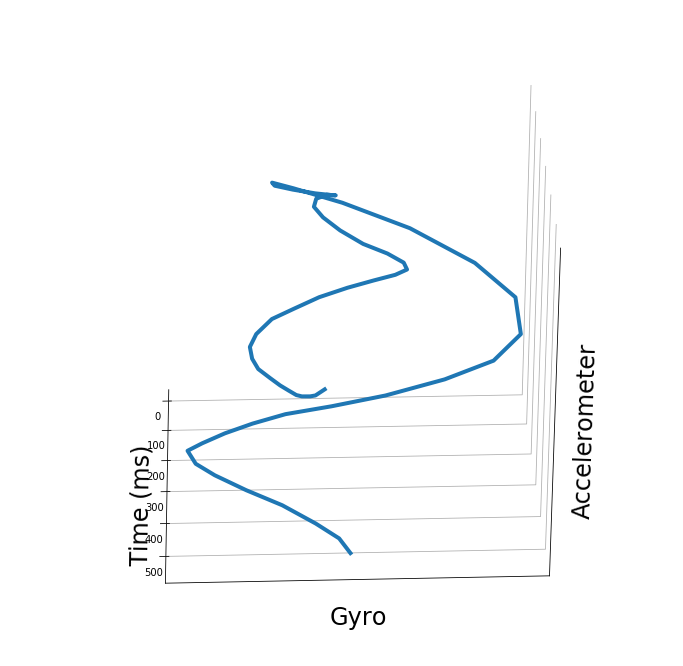

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure(figsize=(12,12))
#ax = fig.add_subplot(111, projection='3d')
#time = np.linspace(1,len(ga_acc),len(ga_acc))
#ax.plot3D(time, ga_gyro, ga_acc, LineWidth=4)
    
for angle in range(0, 360, 2):
    clear_output(wait=True)
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')
    
    # Get rid of the panes
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the spines
    #ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    #ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    #ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the ticks
    #ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.set_zticks([])
    
    #time = np.linspace(1,len(ga_acc)*10,len(ga_acc))
    ax.plot3D(step_template_df.index*10, step_template_df['gyro'], step_template_df['acc'], LineWidth=4)
    ax.view_init(30, angle)
    #plt.axis('off')
    plt.xlabel('Time (ms)',fontsize=24)
    plt.ylabel('Gyro',fontsize=24)
    ax.set_zlabel('Accelerometer',fontsize=24)
    plt.pause(0.01)

#### Save step template as csv

In [23]:
#step_template_df.to_csv('./step_template.csv', index=False)